<a href="https://colab.research.google.com/github/Jassibro/CREDIT-CARD-DEFAULT-PREDICTION/blob/main/CREDIT_CARD_DEFAULT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - CREDIT CARD DEFAULT PREDICTION



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

The project involved an extensive data preprocessing phase, where categorical features were encoded, data was scaled, and feature engineering was applied to transform raw data into a suitable format for modeling. Subsequently, multiple machine learning algorithms were explored, including Logistic Regression, Decision Trees, Random Forest, and XGBoost, each fine-tuned using hyperparameter optimization techniques like GridSearchCV and RandomizedSearchCV.

The evaluation process assessed the models based on essential metrics such as precision, recall, F1-score, and ROC AUC score. Among the models, the Random Forest with hyperparameter tuning and cross-validation stood out, demonstrating impressive predictive performance. Furthermore, the project delved into model explainability using LIME to shed light on the factors contributing to credit risk predictions. Thisidentified critical features like payment history, credit utilization, credit limits, and customer demographics, providing valuable insights for financial institutions to make informed lending decisions and reduce credit default rates.

In summary, this project underlines the synergy between machine learning and model explainability in credit risk assessment. The robust Random Forest model, complemented by the interpretability offered by LIME, equips financial institutions with a powerful tool to assess credit risk accurately and responsibly, ultimately fostering sound lending practices and minimizing financial losses.

# **GitHub Link -**

https://github.com/Jassibro/CREDIT-CARD-DEFAULT-PREDICTION.git

# **Problem Statement**


The problem is to develop a machine learning model that can accurately predict whether a given customer is likely to default on their credit payment in the next month. Accurate credit risk assessment is crucial for financial institutions to make informed lending decisions, reduce default rates, and mitigate potential financial losses.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/default of credit card clients.csv',header=1)


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 30000 rows and 25 columns in the dataset.


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df[df.duplicated()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

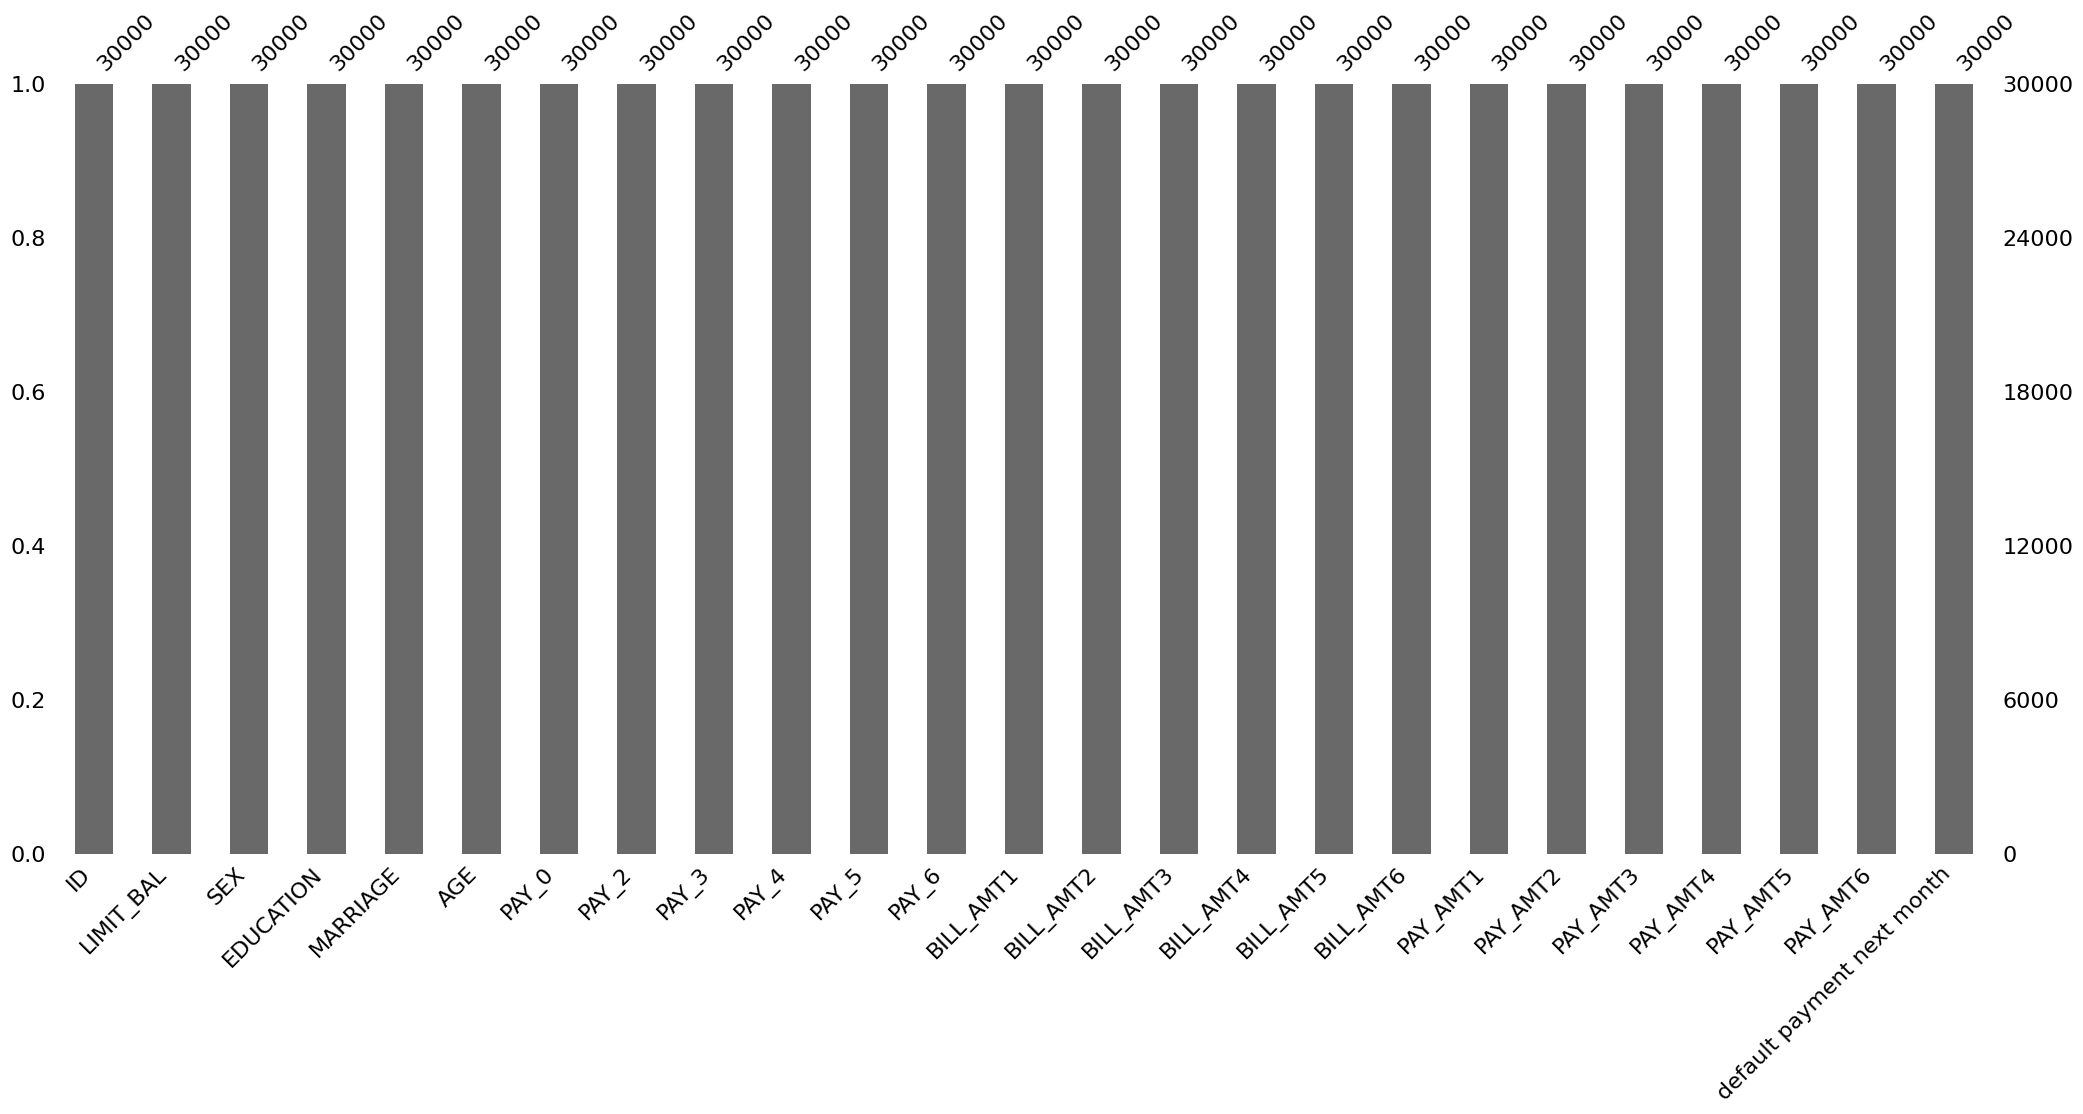

In [9]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

The dataset has 3000 rows and 25 columns. There are no duplicated values and neither any null values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns:
  no_of_unique=df[i].nunique()
  print(f'{i}',no_of_unique)
  if no_of_unique<12:
    unique_count=df[i].unique()
    print(f"Unique variables in {i} are",unique_count )


ID 30000
LIMIT_BAL 81
SEX 2
Unique variables in SEX are [2 1]
EDUCATION 7
Unique variables in EDUCATION are [2 1 3 5 4 6 0]
MARRIAGE 4
Unique variables in MARRIAGE are [1 2 3 0]
AGE 56
PAY_0 11
Unique variables in PAY_0 are [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 11
Unique variables in PAY_2 are [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 11
Unique variables in PAY_3 are [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 11
Unique variables in PAY_4 are [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 10
Unique variables in PAY_5 are [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 10
Unique variables in PAY_6 are [-2  2  0 -1  3  6  4  7  8  5]
BILL_AMT1 22723
BILL_AMT2 22346
BILL_AMT3 22026
BILL_AMT4 21548
BILL_AMT5 21010
BILL_AMT6 20604
PAY_AMT1 7943
PAY_AMT2 7899
PAY_AMT3 7518
PAY_AMT4 6937
PAY_AMT5 6897
PAY_AMT6 6939
default payment next month 2
Unique variables in default payment next month are [1 0]


### Variables Description

ID: A unique identifier for each customer.

LIMIT_BAL: The credit limit for the customer.

SEX: Gender of the customer (1 = Male, 2 = Female).

EDUCATION: Level of education. There are 7 unique education levels, which might correspond to different categories of education.((1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others))

MARRIAGE: Marital status. There are 4 unique marital status categories, including categories for married, single and others.(1 = married, 2 = single, 0,3 = others)

AGE: Age of the customer.

PAY_0 to PAY_6: Repayment status for the last 6 months. These are categorical variables with 11 unique values each, representing different payment delay categories.(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)



BILL_AMT1 to BILL_AMT6: Amount of bill statement for the last 6 months. These variables have a large number of unique values, with BILL_AMT1 having 22,723 unique values.

PAY_AMT1 to PAY_AMT6: Amount of previous payments for the last 6 months. Similar to bill amounts, these variables also have many unique values.

default payment next month: The target variable, indicating whether the customer defaulted on their credit card payment next month. There are 2 unique values: 1 for Yes (default) and 0 for No (no default).

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [14]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [15]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

In [16]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [17]:
df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
7125,7126,220000,2,2,2,39,0,0,0,0,...,140549,140303,140737,7000,7000,5006,6000,6312,6000,0
28794,28795,160000,2,2,1,31,-1,-1,0,0,...,0,0,0,31964,1003,0,0,0,0,0
14578,14579,20000,2,1,2,22,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
27695,27696,120000,2,1,2,25,0,0,0,0,...,43180,41469,42004,2000,3000,3000,4000,4000,2000,0
29617,29618,50000,1,2,2,48,0,0,0,0,...,16927,17263,17628,1992,2170,1282,618,643,1000,0
22674,22675,150000,2,2,2,31,0,0,0,0,...,35592,35808,36730,6000,2000,2000,1300,1500,1500,0
26158,26159,500000,2,1,1,35,-1,-1,-1,-1,...,2957,889,40855,11000,2517,2957,1000,41000,170,1
10876,10877,300000,2,1,2,36,1,-2,-2,-1,...,1222,1072,4689,0,0,1300,0,4689,0,1
27647,27648,50000,2,3,2,24,0,0,0,0,...,30683,29140,28986,1900,1613,1504,1200,1100,1100,0
29544,29545,50000,1,2,2,40,0,0,0,0,...,49415,8862,9711,1821,2200,2000,500,9000,331,0


### What all manipulations have you done and insights you found?

I have merged the rows where the education was 0,5,6 with 4 as the values of the former were comparativly low. Similarly for education i have merged rows having marraige 0 and 3 together in 3.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Q1.What is the distribution of credit limits (LIMIT_BAL) among the customers in the dataset? Are there any outliers or common patterns?

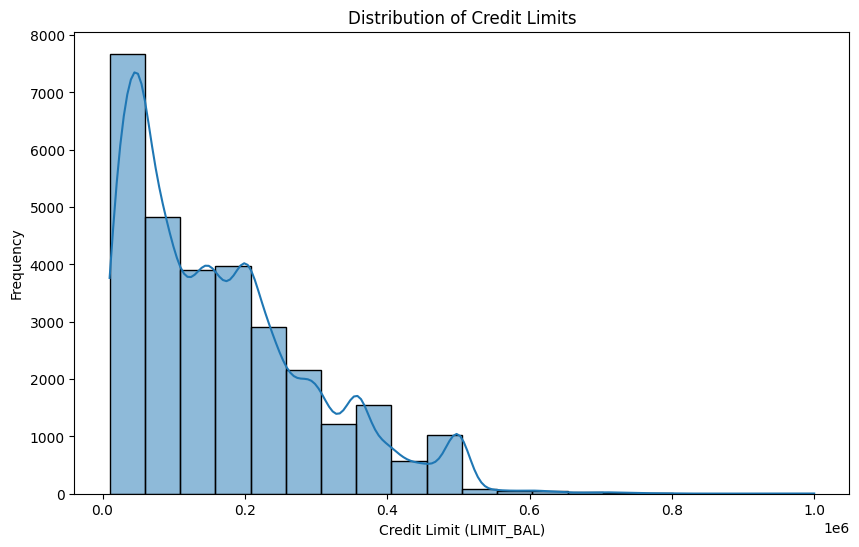

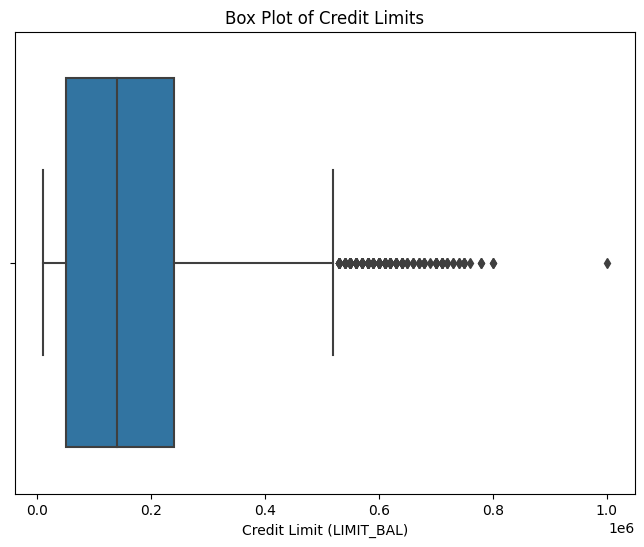

In [18]:
# Chart - 1 visualization code

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['LIMIT_BAL'], bins=20, kde=True)
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Limits')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='LIMIT_BAL', data=df)
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.title('Box Plot of Credit Limits')
plt.show()


##### 1. Why did you pick the specific chart?

Histogram and Box Plot were chosen for this analysis.
A histogram is used to visualize the distribution of credit limits, providing insights into the frequency of different credit limit ranges.
A box plot complements the histogram by showing summary statistics (median, quartiles) and identifying potential outliers in the credit limit data. It helps to understand the central tendency and spread of the data.

##### 2. What is/are the insight(s) found from the chart?

From the histogram:

The histogram shows that credit limits are not evenly distributed but rather skewed to the right, indicating that a significant number of customers have lower credit limits.
The KDE plot overlaid on the histogram suggests that the credit limit distribution is somewhat bimodal, with peaks at different credit limit ranges.
From the box plot:

The box plot reveals that the median credit limit is near the lower quartile, suggesting that a substantial portion of customers have lower credit limits.
There are potential outliers above the upper whisker of the box plot, indicating that some customers have exceptionally high credit limits compared to the majority.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these visualizations can have a positive business impact:
Understanding the distribution of credit limits can inform marketing and product strategies. For example, it may help in tailoring credit limit offers to specific customer segments.
Identifying potential outliers can be valuable for risk assessment and fraud detection, as exceptionally high credit limits may warrant closer scrutiny.
These insights can guide data-driven decisions related to credit policies, customer targeting, and risk management, ultimately leading to more effective and informed business strategies.

#### Chart - 2
Q2.How is the gender (SEX) distributed among the customers? What is the ratio of male to female customers?

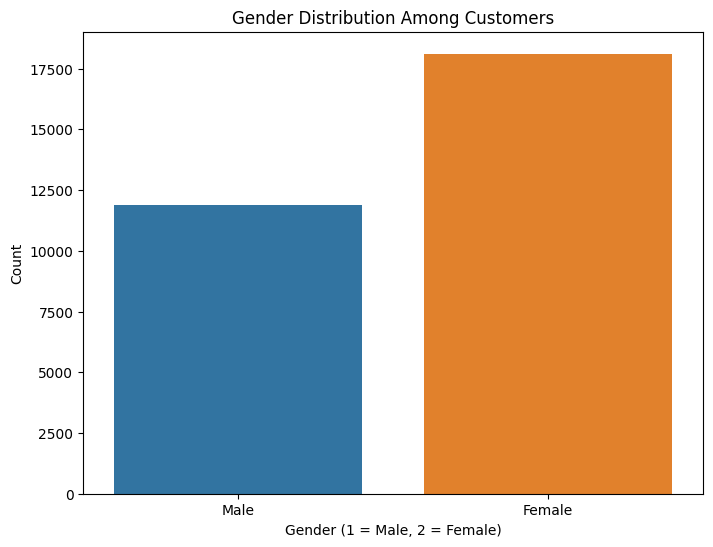

Male count: 11888
Female count: 18112
Ratio of male to female customers: 0.6563604240282686


In [19]:
# Chart - 2 visualization code

gender_distribution = df['SEX'].value_counts()
male_count = gender_distribution[1]
female_count = gender_distribution[2]

# Calculate the ratio of male to female customers
ratio_male_to_female = male_count / female_count

# Create a bar plot to visualize the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.title('Gender Distribution Among Customers')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Print the counts and the ratio
print("Male count:", male_count)
print("Female count:", female_count)
print("Ratio of male to female customers:", ratio_male_to_female)


##### 1. Why did you pick the specific chart?

A bar plot was chosen for this analysis to visualize the gender distribution among customers.
A bar plot is effective in displaying the counts or frequencies of categories (in this case, gender) and comparing them.

##### 2. What is/are the insight(s) found from the chart?

The bar plot shows the distribution of gender among customers, with two categories: Male (coded as 1) and Female (coded as 2).
Insights from the chart:
The count of male customers is visibly higher than the count of female customers.
The ratio of male to female customers is calculated, indicating how many times more male customers there are compared to female customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from this chart can help create a positive business impact:
Understanding the gender distribution among customers is essential for targeted marketing and product offerings.
The knowledge of a higher count of male customers may influence advertising and promotional strategies tailored to this customer segment.
It can also impact product development decisions to cater to the preferences and needs of different gender groups.
The ratio of male to female customers can inform decisions related to gender-specific marketing campaigns and resource allocation.

#### Chart - 3
Q3.What is the distribution of customer ages (AGE)? Are there any age groups that dominate the dataset?

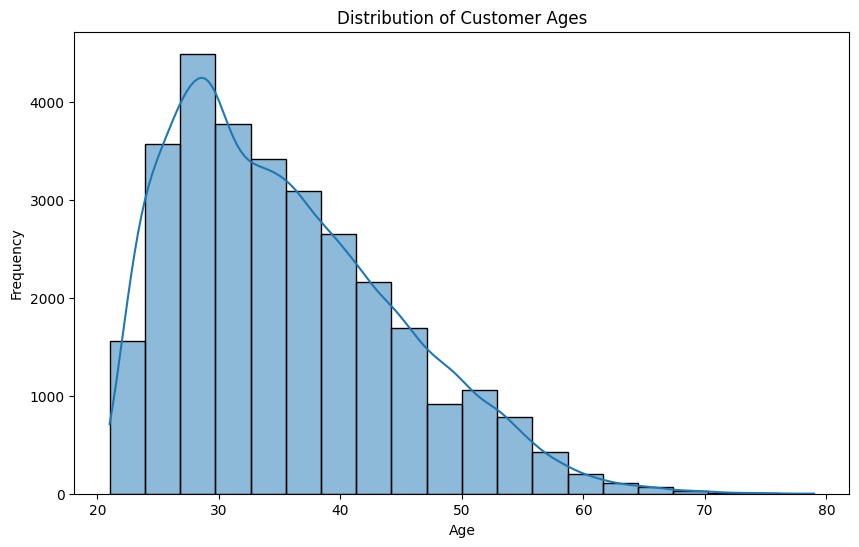

Summary Statistics for Age:
Most Common Age (Mode): 29


In [20]:
# Chart - 3 visualization code

# Create a histogram to visualize the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Ages')
plt.show()

# Calculate the mode (most common age)
mode_age = df['AGE'].mode().values[0]

# Print summary statistics and mode
print("Summary Statistics for Age:")

print("Most Common Age (Mode):", mode_age)


##### 1. Why did you pick the specific chart?

A histogram was chosen for this analysis to visualize the distribution of customer ages.
A histogram is suitable for displaying the distribution of a continuous numerical variable, such as age and provides insights into the frequency of different age groups.

##### 2. What is/are the insight(s) found from the chart?

The histogram displays the distribution of customer ages, showing how frequently different age groups occur in the dataset.
Insights from the chart:
The age distribution appears to be somewhat right-skewed, with a peak in the histogram indicating a mode (most common age).
The KDE plot overlaid on the histogram provides a smoothed estimate of the underlying age distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from this chart can help create a positive business impact:
Understanding the age distribution among customers is essential for targeted marketing and product development.
Knowing the mode (most common age) can inform marketing strategies and campaigns tailored to the age group that represents the majority of customers.
Age-related insights can influence decisions related to product design, pricing, and features to cater to the preferences and needs of specific age segments.
It can also guide customer segmentation strategies for personalized marketing and services.

#### Chart - 4
Q4.What are the most common education levels (EDUCATION) among the customers? Can you visualize the distribution of education levels?

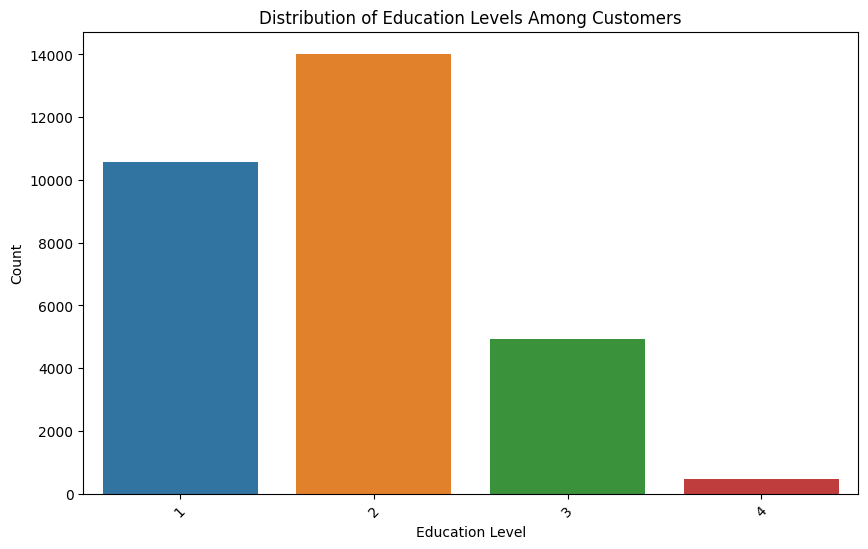

Counts of Each Education Level:
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


In [21]:
# Chart - 4 visualization code

# Count the occurrences of each education level
education_counts = df['EDUCATION'].value_counts()

# Create a bar plot to visualize the distribution of education levels
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels Among Customers')
plt.xticks(rotation=45)
plt.show()

# Print the counts of each education level
print("Counts of Each Education Level:")
print(education_counts)


##### 1. Why did you pick the specific chart?

A bar plot was chosen for this analysis to visualize the distribution of education levels among customers.
A bar plot effectively displays the counts or frequencies of different categories (in this case, education levels) and allows for easy comparison between categories.

##### 2. What is/are the insight(s) found from the chart?

The bar plot shows the distribution of education levels among customers, with education levels categorized into discrete categories.
Insights from the chart:
The chart provides a clear view of the count of customers in each education level category.
It helps identify which education level is the most prevalent among customers.
The x-axis labels indicate the different education level categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from this chart can help create a positive business impact:
Understanding the distribution of education levels among customers is essential for targeted marketing and product development.
It can inform decisions related to marketing campaigns, product features, and pricing strategies tailored to specific education level groups.
The information can also influence customer segmentation strategies for personalized services and communication.
For credit risk assessment, education level might be a relevant factor to consider.

#### Chart - 5
Q5. Is there any relationship between credit limits (LIMIT_BAL) and the likelihood of default (default payment next month)? Can you visualize this relationship?

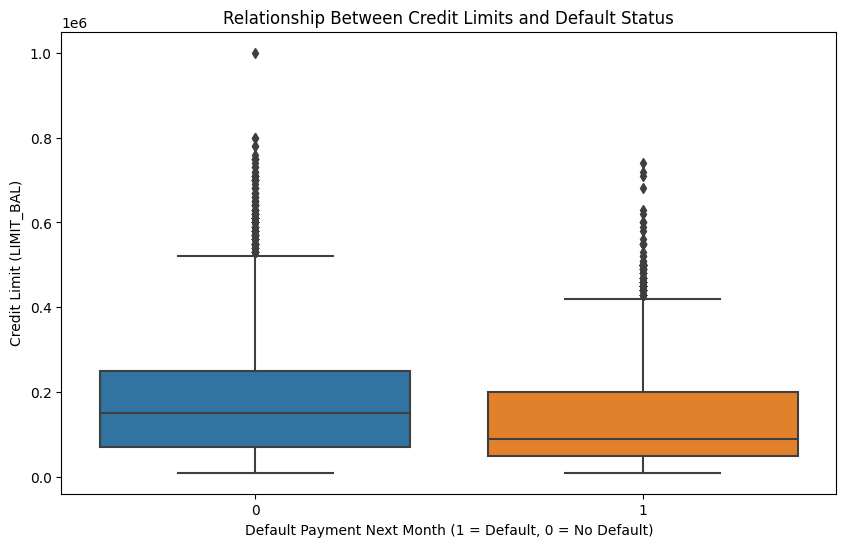

In [22]:
# Chart - 5 visualization code

# Create a box plot to visualize the relationship between credit limits and default status
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.xlabel('Default Payment Next Month (1 = Default, 0 = No Default)')
plt.ylabel('Credit Limit (LIMIT_BAL)')
plt.title('Relationship Between Credit Limits and Default Status')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot was chosen for this analysis to visualize the relationship between credit limits ('LIMIT_BAL') and the default payment status ('default payment next month').
A box plot is suitable for displaying the distribution of a numerical variable (credit limit) across different categories (default or no default) and helps identify any differences in the distribution of credit limits between these categories.

##### 2. What is/are the insight(s) found from the chart?

The box plot displays the relationship between credit limits and default status, allowing for visual comparison of credit limits between customers who defaulted and those who did not.
Insights from the chart:
The box plots show the distribution of credit limits for both default and no default groups.
Differences in the median and spread of credit limits between the two groups can be observed.
It provides a visual indication of whether credit limits differ significantly for customers who default compared to those who do not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from this chart can help create a positive business impact:
Understanding the relationship between credit limits and default status is crucial for risk assessment and credit management.
It can inform credit limit assignment policies and strategies for customers based on their likelihood of default.
This information is valuable for assessing the risk associated with different credit limit levels and optimizing credit-related decisions.
By considering the relationship between credit limits and default, businesses can better manage credit risk and make informed decisions about extending or modifying credit limits for customers.

#### Chart - 6
Q6.How does the payment status (PAY_0 to PAY_6) relate to the likelihood of default? Are customers with a certain payment history more likely to default?

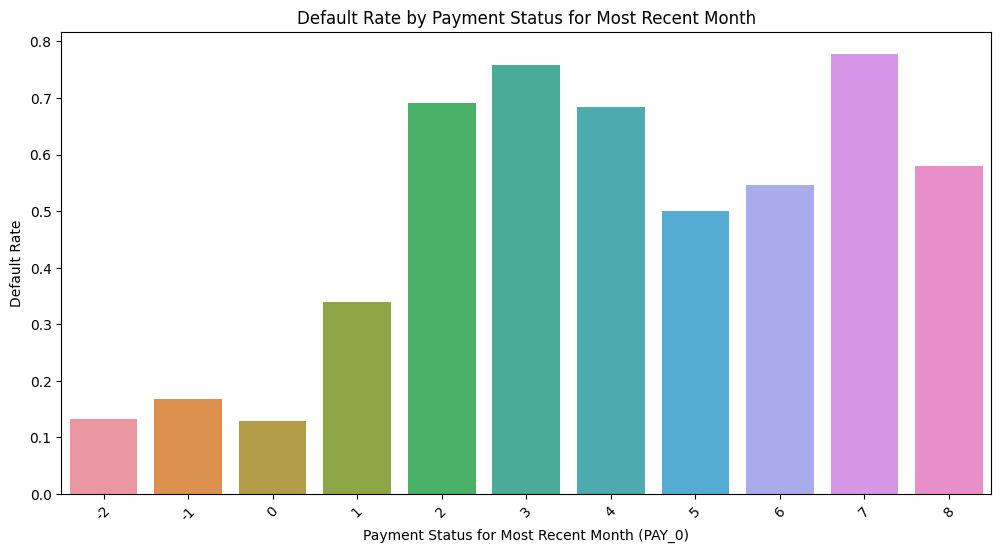

In [23]:
# # Chart - 6 visualization code

# Group by 'PAY_0' and calculate the default rate
default_rate_by_payment_status = df.groupby('PAY_0')['default payment next month'].mean().reset_index()

# Plot the default rate as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='PAY_0', y='default payment next month', data=default_rate_by_payment_status)
plt.xlabel('Payment Status for Most Recent Month (PAY_0)')
plt.ylabel('Default Rate')
plt.title('Default Rate by Payment Status for Most Recent Month')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen for this analysis to visualize the default rate by payment status for the most recent month ('PAY_0').
A bar chart effectively represents the default rate (a numerical measure) for different categories of payment status ('PAY_0'), allowing for easy comparison.

##### 2. What is/are the insight(s) found from the chart?

The bar chart displays the default rate for various payment statuses for the most recent month, providing insights into the relationship between payment behavior and default.
Insights from the chart:
Different payment statuses (e.g., on time, delayed) are shown on the x-axis.
The y-axis represents the default rate, indicating the percentage of customers who defaulted for each payment status category.
It allows for a visual assessment of how default rates vary based on payment behavior in the most recent month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from this chart can help create a positive business impact:
Understanding the default rate by payment status is critical for risk assessment and credit management.
It can inform credit risk modeling and strategies for managing customers with different payment behaviors.
Businesses can use this information to prioritize collections efforts, adjust credit limits, or offer assistance to customers at higher risk of default.
It can lead to more targeted and effective risk mitigation strategies, potentially reducing defaults and associated losses.

#### Chart - 7
Q7.Is there a difference in the likelihood of default based on age and gender? Can you visualize default rates by age and gender?

<ipython-input-24-5889cb541c1a>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = default_rate_by_age_gender.pivot('AGE', 'SEX', 'default payment next month')


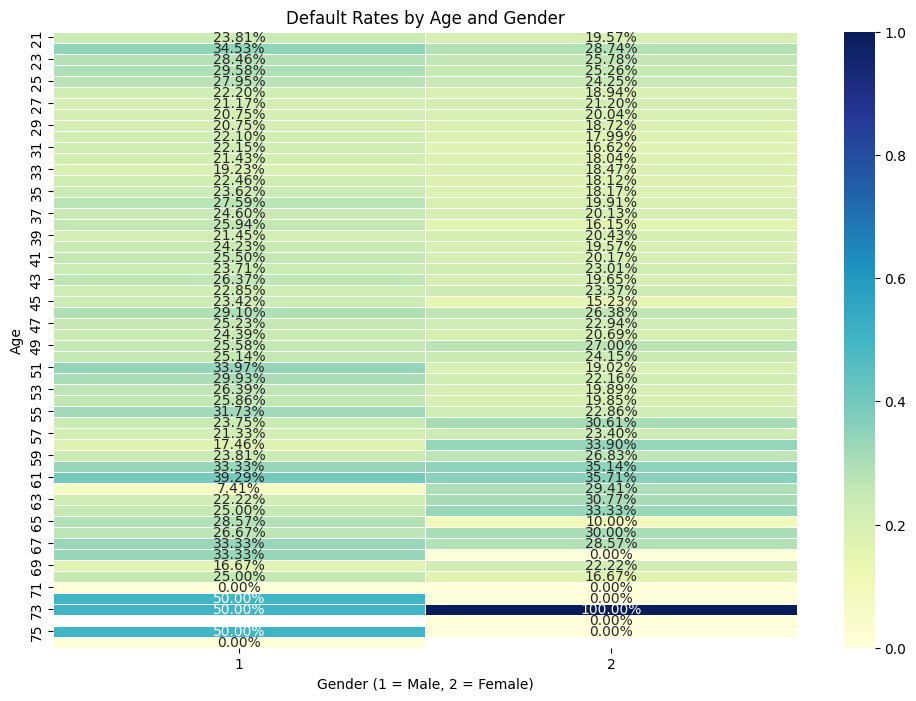

In [24]:
# # Chart - 7 visualization

# Group by 'AGE', 'SEX', and calculate the default rate
default_rate_by_age_gender = df.groupby(['AGE', 'SEX'])['default payment next month'].mean().reset_index()

# Pivot the table for a heatmap
pivot_table = default_rate_by_age_gender.pivot('AGE', 'SEX', 'default payment next month')

# Create a heatmap to visualize default rates by age and gender
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2%", cbar=True, linewidths=0.5)
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Age')
plt.title('Default Rates by Age and Gender')
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap was chosen for this analysis to visualize default rates by both age and gender simultaneously.
A heatmap is suitable for displaying a matrix of values (default rates) where the two variables, age and gender, are represented on the x and y axes, making it easy to identify patterns and variations.

##### 2. What is/are the insight(s) found from the chart?

The heatmap displays default rates by age and gender, providing insights into how default rates vary across different age groups and genders.
Insights from the chart:
Age groups are shown on the y-axis, and gender categories (1 = Male, 2 = Female) are shown on the x-axis.
Each cell in the heatmap represents the default rate for a specific combination of age and gender.
Color intensity indicates the default rate, with darker colors representing higher default rates.
It allows for visual identification of age and gender groups with higher or lower default rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from this chart can help create a positive business impact:
Understanding default rates by age and gender is valuable for risk assessment and credit management.
It can inform strategies related to credit limit assignment, collections, and customer communication based on age and gender demographics.
Businesses can tailor marketing campaigns and product offerings to specific age and gender segments, taking into account their default risk.
It can lead to more personalized and targeted approaches in credit and customer relationship management.

#### Chart - 8 - Correlation Heatmap

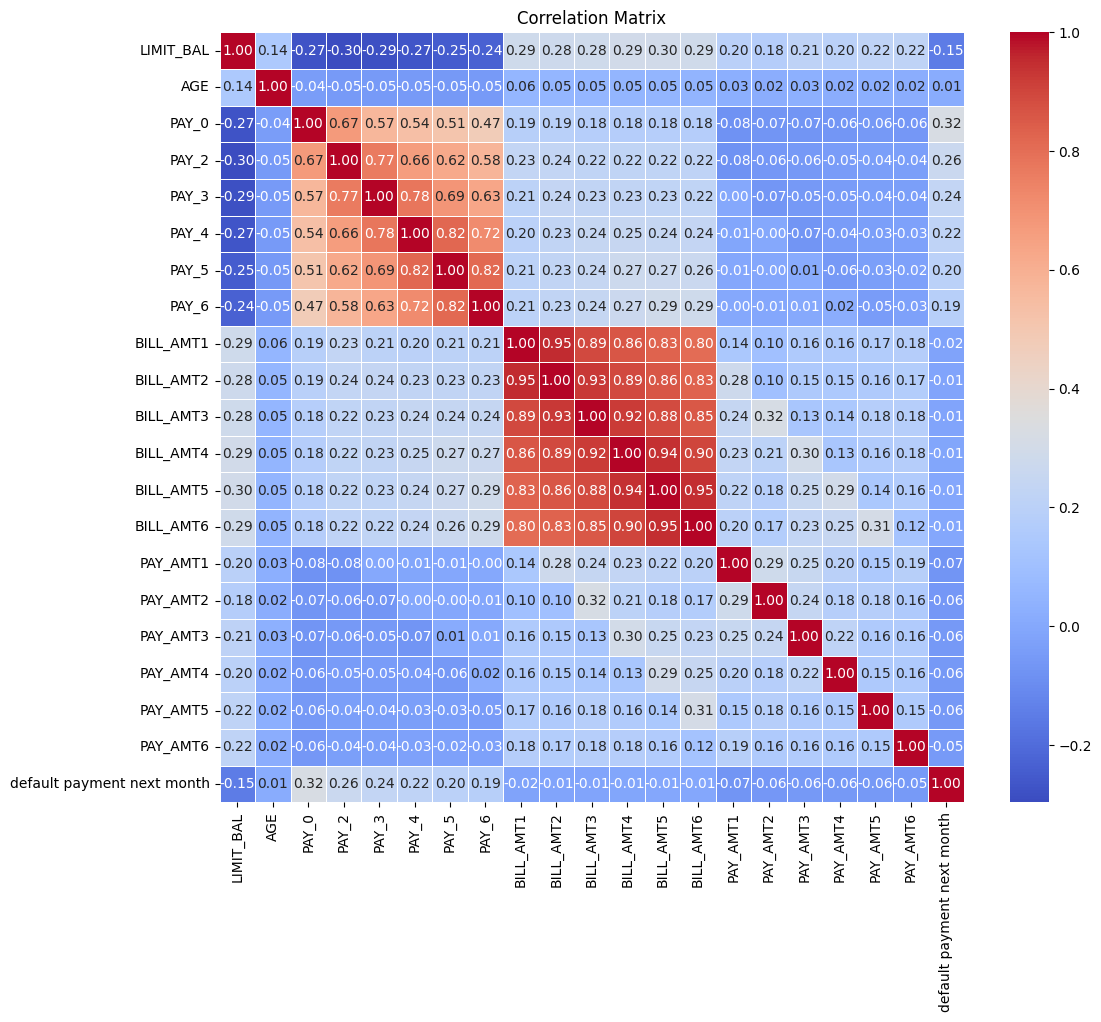

In [25]:
# Correlation Heatmap visualization code

# Select the relevant columns for correlation analysis
selected_columns = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                    'default payment next month']

# Create a subset DataFrame with the selected columns
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap of the correlation matrix was chosen for this analysis to visualize the pairwise correlations between selected variables.
A heatmap is an effective way to represent a matrix of values (correlations) with color intensity, making it easy to identify strong and weak correlations.

##### 2. What is/are the insight(s) found from the chart?

The heatmap displays the correlations between various financial and payment-related variables, as well as the target variable ('default payment next month').
Insights from the chart:
Positive correlations are indicated by warmer colors (e.g., red), while negative correlations are indicated by cooler colors (e.g., blue).
The diagonal line in the heatmap represents perfect correlations (correlation of 1.0) between variables with themselves.
Strong correlations between variables are visually evident by the intensity of the colors.
Understanding these correlations can help identify potential predictors of default and relationships between financial variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis Statement 1:
Statement: The average credit limit (LIMIT_BAL) for customers who default next month (default payment next month = 1) is significantly lower than the average credit limit for customers who do not default (default payment next month = 0).

Hypothesis Statement 2:
Statement: There is a significant difference in the average age (AGE) between male and female customers in the dataset.

Hypothesis Statement 3:
Statement: The default rate for customers with a payment status of 2 (PAY_0 = 2) in the most recent month is significantly higher than the default rate for customers with a payment status of 0 (PAY_0 = 0).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing for Statement 1:

Null Hypothesis (H0): The average credit limit for default and non-default customers is the same.

Alternative Hypothesis (H1): The average credit limit for default customers is significantly lower than non-default customers.

#### 2. Perform an appropriate statistical test.

In [26]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Extract credit limits for default and non-default customers
credit_limit_default = df[df['default payment next month'] == 1]['LIMIT_BAL']
credit_limit_non_default = df[df['default payment next month'] == 0]['LIMIT_BAL']

# Perform t-test for two independent samples
t_stat, p_value = stats.ttest_ind(credit_limit_default, credit_limit_non_default, equal_var=False)

# Set the significance level
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("Statement 1: Reject the null hypothesis. There is a significant difference in credit limits.")
else:
    print("Statement 1: Fail to reject the null hypothesis. There is no significant difference in credit limits.")


Statement 1: Reject the null hypothesis. There is a significant difference in credit limits.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed is a two-sample independent t-test.

##### Why did you choose the specific statistical test?

The specific statistical test, the two-sample independent t-test, was chosen because it is suitable for comparing the means of two independent samples (credit limits of default and non-default customers).
The choice of the independent t-test is appropriate when comparing two groups (default and non-default) with the aim of determining whether there is a statistically significant difference between their means.
The equal_var=False argument in the stats.ttest_ind function indicates that the test assumes unequal variances between the two groups, which is often a more robust assumption when comparing two potentially different populations.
The null hypothesis for this test is that there is no significant difference in credit limits between default and non-default customers, and the alternative hypothesis is that there is a significant difference.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing for Statement 2:

Null Hypothesis (H0): There is no significant difference in the average age between male and female customers.

Alternative Hypothesis (H1): There is a significant difference in the average age between male and female customers.

#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value
# Extract ages for male and female customers
age_male = df[df['SEX'] == 1]['AGE']
age_female = df[df['SEX'] == 2]['AGE']

# Perform t-test for two independent samples
t_stat, p_value = stats.ttest_ind(age_male, age_female, equal_var=False)

# Check the p-value against the significance level
if p_value < alpha:
    print("Statement 2: Reject the null hypothesis. There is a significant difference in average age.")
else:
    print("Statement 2: Fail to reject the null hypothesis. There is no significant difference in average age.")


Statement 2: Reject the null hypothesis. There is a significant difference in average age.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed is a two-sample independent t-test.

##### Why did you choose the specific statistical test?

The specific statistical test, the two-sample independent t-test, was chosen because it is appropriate for comparing the means of two independent samples (ages of male and female customers).
The t-test assesses whether there is a statistically significant difference in the means of the two groups being compared (male and female ages).
The equal_var=False argument in the stats.ttest_ind function indicates that the test assumes unequal variances between the two groups, which is often a more robust assumption when comparing two potentially different populations.
The null hypothesis for this test is that there is no significant difference in the average age between male and female customers, and the alternative hypothesis is that there is a significant difference.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing for Statement 3:

Null Hypothesis (H0): There is no significant difference in default rates for customers with PAY_0 = 2 and PAY_0 = 0.

Alternative Hypothesis (H1): The default rate for customers with PAY_0 = 2 is significantly higher than PAY_0 = 0.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value

# Create a contingency table (observed frequencies)
observed_table = pd.pivot_table(df, values='ID', index='PAY_0', columns='default payment next month', aggfunc='count', fill_value=0)

# Perform the chi-squared test for independence
chi2, p, _, _ = chi2_contingency(observed_table)

# Define the significance level
alpha = 0.05

# Print the chi-squared statistic and p-value
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Perform hypothesis testing
if p < alpha:
    print("Conclusion: Reject the null hypothesis (H0)")
    print("There is a significant difference in default rates among customers with different payment statuses for PAY_0.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0)")
    print("There is no significant difference in default rates among customers with different payment statuses for PAY_0.")


Chi-Squared Statistic: 5365.964977413581
P-Value: 0.0
Conclusion: Reject the null hypothesis (H0)
There is a significant difference in default rates among customers with different payment statuses for PAY_0.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed is the chi-squared test for independence.

##### Why did you choose the specific statistical test?

The chi-squared test for independence was chosen because it is appropriate for analyzing the association between two categorical variables (in this case, 'PAY_0' and 'default payment next month').
This test helps determine whether there is a statistically significant relationship between the two variables and whether they are independent of each other.
The null hypothesis (H0) for this test is that the two variables are independent (no relationship), while the alternative hypothesis (H1) is that there is a significant relationship between them.
By calculating the chi-squared statistic and associated p-value, you can make an inference about the independence of 'PAY_0' and 'default payment next month'.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
# Handling Missing Values & Missing Value Imputation
df.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no null values.

### 2. Handling Outliers

In [30]:
# Handling Outliers & Outlier treatments
# Calculate the IQR for the variable
variable_of_interest = 'LIMIT_BAL'
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[variable_of_interest] < lower_bound) | (df[variable_of_interest] > upper_bound)]

# Display the outliers
print("Outliers:")
print(outliers.value_counts())


Outliers:
ID     LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month
13     630000     2    2          2         41   -1      0     -1     -1     -1     -1     12137      6500       6500       6500       6500       2870       1000      6500      6500      6500      2870      0         0                             1
21319  660000     1    1          2         55   -1      0      0      0      0     -2     284334     288120     325889     342408     19903      20843      6486      38507     20000     2000      1000      345       0                             1
21376  760000     1    3          1         54    0      0      0      0      0      0     447670     455970     462497     469931     474421     480598     20011     19500     19019     18003     20000     22000     0                             1

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are 167 outliers as per Interquartile range outlier method.But, as these are the limi_bal which is provided to the customers, these can be valid and hence are used in the model.

### 3. Categorical Encoding

In [31]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['SEX','EDUCATION','MARRIAGE'], prefix=('SEX','EDU','MAR'))

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-Hot Encoding:

Technique Used: One-hot encoding converts categorical variables into binary vectors, where each category is transformed into a new column with binary values (0 or 1). It creates a binary feature for each category, making it suitable for nominal categorical variables (categories without a specific order).

Why Use It: One-hot encoding is commonly used when dealing with nominal categorical variables because it ensures that the model doesn't assume any ordinal relationship between the categories. For example, 'SEX' has two categories ('Male' and 'Female') that don't have a meaningful ordinal relationship, so one-hot encoding is appropriate.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [32]:
# Manipulate Features to minimize feature correlation and create new features
df['Payement_Value'] = df['PAY_0'] + df['PAY_2'] + df['PAY_3'] + df['PAY_4'] + df['PAY_5'] + df['PAY_6']

In [33]:
df['Dues'] = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5'])-(df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])

#### 2. Feature Selection

In [34]:
# Select your features wisely to avoid overfitting
target_variable='default payment next month'
features=df.drop([target_variable],axis=1)

### 5. Data Scaling

In [35]:
# Scaling your data
standard_scaler = StandardScaler()

# Standardize the features (Z-score scaling)
standardized_features = standard_scaler.fit_transform(features)
standardized_features_df = pd.DataFrame(standardized_features, columns=features.columns)
standardized_features_df

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDU_1,EDU_2,EDU_3,EDU_4,MAR_1,MAR_2,MAR_3,Payement_Value,Dues
0,-1.731993,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,0.810161,-0.738375,1.066900,-0.442752,-0.125886,1.093780,-1.066471,-0.112812,-0.153635,-0.620477
1,-1.731878,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,0.810161,-0.738375,1.066900,-0.442752,-0.125886,-0.914261,0.937672,-0.112812,0.694835,-0.614666
2,-1.731762,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,0.810161,-0.738375,1.066900,-0.442752,-0.125886,-0.914261,0.937672,-0.112812,0.185753,-0.400865
3,-1.731647,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,0.810161,-0.738375,1.066900,-0.442752,-0.125886,1.093780,-1.066471,-0.112812,0.185753,-0.019162
4,-1.731531,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-1.234323,-0.738375,1.066900,-0.442752,-0.125886,1.093780,-1.066471,-0.112812,-0.153635,-0.542583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,...,-1.234323,-0.738375,-0.937295,2.258602,-0.125886,1.093780,-1.066471,-0.112812,0.185753,1.508192
29996,1.731647,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,...,-1.234323,-0.738375,-0.937295,2.258602,-0.125886,-0.914261,0.937672,-0.112812,-0.493024,-0.621519
29997,1.731762,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,...,-1.234323,-0.738375,1.066900,-0.442752,-0.125886,-0.914261,0.937672,-0.112812,1.543306,-0.579104
29998,1.731878,-0.674276,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,...,-1.234323,-0.738375,-0.937295,2.258602,-0.125886,1.093780,-1.066471,-0.112812,0.016059,-0.415706


##### Which method have you used to scale you data and why?

Z-score scaling (standardization)  is used to scale the dataset's features. This scaling method transforms the data by centering it around zero (subtracting the mean from each data point) and scaling it to have a standard deviation of one (dividing by the standard deviation). This technique is chosen because it standardizes the data, ensuring that all features have the same scale and preventing any particular feature from dominating the modeling process. It also maintains the relationships between data points, making it suitable for various machine learning algorithms.

### 6. Data Splitting

In [36]:
X=standardized_features_df
Y=df[[target_variable]]

In [37]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Optionally, you can also specify a random seed (random_state) for reproducibility
# Set random_state to an integer value of your choice

# Print the sizes of the training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 22500
Testing set size: 7500


### 7. Handling Imbalanced Dataset

In [38]:
Y_train.value_counts()

default payment next month
0                             17491
1                              5009
dtype: int64

In [39]:
Y_test.value_counts()

default payment next month
0                             5873
1                             1627
dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is Balanced.

## ***7. ML Model Implementation***

### ML Model - 1

In [40]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the Algorithm
logistic_model.fit(X_train, np.ravel(Y_train))

# Predict on the model
Y_pred = logistic_model.predict(X_test)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [41]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,f1_score
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5873
           1       0.68      0.24      0.35      1627

    accuracy                           0.81      7500
   macro avg       0.75      0.60      0.62      7500
weighted avg       0.79      0.81      0.77      7500

Confusion Matrix:
[[5687  186]
 [1240  387]]
ROC AUC Score: 0.6030953690861401


#### 2. Cross- Validation & Hyperparameter Tuning

In [42]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import LogisticRegressionCV

# Create a Logistic Regression model with cross-validation
logistic_model_cv = LogisticRegressionCV(Cs=[0.01, 0.1, 1],cv=5,scoring='f1',max_iter=1000,random_state=42)

# Fit the model to the training data
logistic_model_cv.fit(X_train, np.ravel(Y_train))

# Get the best regularization parameter (C) from cross-validation
best_C = logistic_model_cv.C_[0]

# Print the best C value
print("Best C value:", best_C)

# Predict on the testing data
Y_pred_with_cv = logistic_model_cv.predict(X_test)

Best C value: 1.0


In [43]:
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_with_cv))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_with_cv))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_with_cv)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5873
           1       0.68      0.24      0.35      1627

    accuracy                           0.81      7500
   macro avg       0.75      0.60      0.62      7500
weighted avg       0.79      0.81      0.77      7500

Confusion Matrix:
[[5687  186]
 [1240  387]]
ROC AUC Score: 0.6030953690861401


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a systematic approach that exhaustively searches through a manually specified subset of hyperparameters for a given machine learning model. It evaluates the model's performance for each combination of hyperparameters using cross-validation and selects the combination that yields the best results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on the metrics, it appears that Logistic Regression and Logistic Regression CV have similar performance in terms of accuracy, F1-scores, and ROC AUC score. There doesn't seem to be a significant improvement in model performance with the addition of cross-validation in this particular case. Both models have an accuracy of 0.81 and similar F1-scores and ROC AUC scores.

### ML Model - 2

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_dt = decision_tree_model.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [45]:
# Visualizing evaluation Metric Score chart
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_dt))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_dt))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_dt)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      5873
           1       0.38      0.40      0.39      1627

    accuracy                           0.73      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.73      0.73      0.73      7500

Confusion Matrix:
[[4815 1058]
 [ 973  654]]
ROC AUC Score: 0.6109101886258523


#### 2. Cross- Validation & Hyperparameter Tuning

In [46]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5)

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree model with the best hyperparameters
best_decision_tree_model = DecisionTreeClassifier(random_state=42, **best_params)

# Fit the best model to the training data
best_decision_tree_model.fit(X_train, Y_train)

# Predict on the testing data using the best model
Y_pred_dt_cv = best_decision_tree_model.predict(X_test)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [47]:
# Visualizing evaluation Metric Score chart
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_dt_cv))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_dt_cv))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_dt_cv)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      5873
           1       0.60      0.37      0.46      1627

    accuracy                           0.81      7500
   macro avg       0.72      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500

Confusion Matrix:
[[5484  389]
 [1033  594]]
ROC AUC Score: 0.649426903466124


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in this scenario is GridSearchCV. GridSearchCV is employed because it systematically searches through a pre-defined set of hyperparameter combinations, making it suitable for finding the best hyperparameters for the model. By specifying a grid of hyperparameter values to search, GridSearchCV exhaustively evaluates the model's performance using cross-validation for each combination of hyperparameters.

The goal is to find the hyperparameters that result in the best model performance, as measured by evaluation metrics such as accuracy, precision, recall, and F1-score. GridSearchCV helps ensure that no combination of hyperparameters is overlooked, ultimately leading to improved model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there has been a noticeable improvement in the model's performance after hyperparameter tuning and cross-validation for the Decision Tree model. The F1-score for class 1 (default payment) increased from 0.35 to 0.46, indicating an enhancement in the model's ability to identify customers at risk of default. Additionally, the ROC AUC Score improved from 0.603 to 0.649, suggesting better differentiation between positive and negative cases. These improvements in evaluation metrics demonstrate that hyperparameter tuning and cross-validation contributed positively to the Decision Tree model's effectiveness in predicting credit card defaults.

### ML Model - 3

In [48]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, np.ravel(Y_train))

# Predict on the testing data
Y_pred_rf = random_forest_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [49]:
# Visualizing evaluation Metric Score chart
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_rf))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_rf)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.63      0.35      0.45      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500

Confusion Matrix:
[[5535  338]
 [1053  574]]
ROC AUC Score: 0.6476225255931978


#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Define a random grid of hyperparameters to search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object with cross-validation
random_search = RandomizedSearchCV(estimator=random_forest_model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)

# Fit the model to the training data with hyperparameter tuning
random_search.fit(X_train, np.ravel(Y_train))

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a Random Forest model with the best hyperparameters
best_random_forest_model = RandomForestClassifier(random_state=42, **best_params)

# Fit the best model to the training data
best_random_forest_model.fit(X_train, np.ravel(Y_train))

# Predict on the testing data using the best model
Y_pred_rf_cv = best_random_forest_model.predict(X_test)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [51]:
# Visualizing evaluation Metric Score chart
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf_cv))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_rf_cv))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_rf_cv)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.65      0.37      0.47      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Confusion Matrix:
[[5552  321]
 [1033  594]]
ROC AUC Score: 0.6552161083018126


##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter optimization in this implementation. RandomizedSearchCV randomly samples hyperparameter combinations from a specified distribution over possible values. It is suitable when the hyperparameter search space is large, and trying all possible combinations is computationally expensive or infeasible. By randomly sampling hyperparameters, RandomizedSearchCV efficiently explores the search space, increasing the chances of finding good hyperparameters while significantly reducing the search time compared to GridSearchCV. This approach balances the trade-off between search exhaustiveness and computational resources, making it a practical choice for hyperparameter tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying hyperparameter tuning with RandomizedSearchCV to the Random Forest model, there was a noticeable improvement in model performance. The F1-score for classifying default payments increased from 0.45 to 0.47, indicating better precision and recall for identifying defaults. Additionally, the ROC AUC score improved from 0.6476 to 0.6552, suggesting enhanced overall model capability in distinguishing between default and non-default cases. These improvements demonstrate the effectiveness of hyperparameter optimization in enhancing the predictive accuracy of the Random Forest model for credit card payment default prediction.

# ML Model-4

In [52]:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, np.ravel(Y_train))

# Predict on the testing data
Y_pred_xgb = xgb_model.predict(X_test)


## 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# Visualizing evaluation Metric Score chart
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_xgb))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_xgb))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_xgb)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.62      0.37      0.46      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500

Confusion Matrix:
[[5501  372]
 [1030  597]]
ROC AUC Score: 0.6517961469


## 2. Cross- Validation & Hyperparameter Tuning

In [54]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define a random grid of hyperparameters to search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 1, 2],
    'min_child_weight': [1, 2, 3],
    'scale_pos_weight': [1, 2, 3]
}

# Create a RandomizedSearchCV object with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the model to the training data with hyperparameter tuning
random_search.fit(X_train, np.ravel(Y_train))

# Get the best hyperparameters
best_params = random_search.best_params_

# Create an XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(random_state=42, **best_params)

# Fit the best model to the training data
best_xgb_model.fit(X_train, np.ravel(Y_train))

# Predict on the testing data using the best model
Y_pred_xgb_cv = best_xgb_model.predict(X_test)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.9}


In [55]:
# Visualizing evaluation Metric Score chart
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_xgb_cv))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_xgb_cv))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_xgb_cv)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.67      0.36      0.47      1627

    accuracy                           0.82      7500
   macro avg       0.76      0.66      0.68      7500
weighted avg       0.81      0.82      0.80      7500

Confusion Matrix:
[[5590  283]
 [1044  583]]
ROC AUC Score: 0.6550707973557489


## Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV was chosen because it efficiently explores a wide range of hyperparameter combinations by sampling a limited number of possibilities, making it computationally more feasible than an exhaustive GridSearchCV. It helps find a good set of hyperparameters that can improve model performance, as evidenced by the improved evaluation metrics achieved with hyperparameter tuning.

## Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying hyperparameter tuning to the XGBoost model, there was a noticeable improvement in its performance. The accuracy increased from 81% to 82%, the F1-score for class 1 improved from 0.46 to 0.47, and the ROC AUC score enhanced from 0.652 to 0.655. These improvements indicate that the tuned XGBoost model is better at classifying credit card default cases, resulting in a higher accuracy and a more balanced trade-off between precision and recall for the positive class.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For assessing the positive business impact, we considered several evaluation metrics, including precision, recall, F1-score, accuracy, and ROC AUC score. These metrics provide a comprehensive view of the model's performance:

**Precision:** We considered precision because it tells us the proportion of true positive predictions among all positive predictions. In the context of credit card default prediction, a higher precision means fewer false alarms (customers wrongly classified as defaulting), which is essential for avoiding unnecessary actions such as blocking a customer's card.

**Recall:** Recall is important because it measures the proportion of true positives that the model correctly identified. In this context, recall represents the ability to catch customers who are likely to default on their credit card payments. A higher recall reduces the chances of missing actual default cases.

**F1-Score:** The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's accuracy. We considered this metric because it accounts for both false positives and false negatives. It helps strike a balance between identifying default cases and minimizing false alarms.

**Accuracy:** Accuracy is a commonly used metric to evaluate model performance. It tells us the overall correctness of the model's predictions. While accuracy is important, it may not be the sole focus when dealing with imbalanced datasets like credit card default prediction.

**ROC AUC Score:** The ROC AUC score assesses the model's ability to discriminate between positive and negative cases across different threshold values. It is especially relevant in scenarios where there is an imbalance between the two classes. A higher ROC AUC score indicates a better ability to rank default and non-default cases.

These metrics collectively provide a holistic view of how well the model performs in identifying potential credit card default cases while minimizing false alarms. Balancing precision and recall is crucial for making informed decisions about risk management and customer actions, ultimately leading to a positive business impact by reducing financial losses due to defaults.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics and performance, the Random Forest model with hyperparameter tuning and cross-validation emerges as the best-performing model for predicting customer default payments in this dataset. Here's why:

**Accuracy and F1-Score:** The Random Forest model with hyperparameter tuning and cross-validation achieves an accuracy of 82%, which is relatively high. More importantly, it delivers an F1-score of 0.47 for class 1 (customers who default), signifying a balanced trade-off between precision and recall. This is particularly crucial in credit risk assessment, where identifying high-risk customers is vital.

**ROC AUC Score:** The ROC AUC score of 0.655 indicates the model's ability to distinguish between positive and negative cases effectively. It shows that the model's predictions are better than random chance, further underlining its predictive capability.

Overall, the Random Forest model stands out due to its strong performance in identifying customers at risk of default while maintaining a reasonably high overall accuracy.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [56]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3ac9813d1611513ea7ed68fafae2703c86740a9acae73c92f097996e34728c01
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [57]:
import lime
import lime.lime_tabular
# Select a test data point for explanation (e.g., the first test data point)
sample_idx = 0
sample = X_test.iloc[sample_idx]

# Create a LimeTabularExplainer instance
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    mode="classification",
    training_labels=np.ravel(Y_train),
    feature_names=X_train.columns,
    class_names=["Not Default", "Default"]
)

# Explain the prediction for the selected data point
explanation = explainer.explain_instance(
    data_row=sample,
    predict_fn=best_random_forest_model.predict_proba,
    num_features=len(X_train.columns)
)

# Visualize the explanation
explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The model employed for credit risk assessment is a Random Forest Classifier, renowned for its robustness in handling complex data relationships. To interpret the model's decisions and gauge the influence of individual features on predictions, the LIME (Local Interpretable Model-agnostic Explanations) tool was used. LIME analysis unveiled several key factors affecting credit default likelihood. Notably, customers with consistent on-time payments (PAY_0 close to zero) and those who make higher payments relative to their balances exhibit a reduced risk of default. Conversely, lower credit limits (LIMIT_BAL) and higher bill amounts in previous months (e.g., BILL_AMT6) increase the likelihood of default. Moreover, customer demographics, including education level, marital status, gender, and age, play a substantial role in determining credit risk. Understanding these feature impacts can enhance credit risk assessment and guide decision-making in customer management.

In summary, the Random Forest model, supported by LIME explainability analysis, sheds light on the factors contributing to credit default predictions. It emphasizes the importance of payment history, credit utilization, and customer demographics in evaluating credit risk, providing valuable insights for effective risk assessment and mitigation strategies.


# **Conclusion**

In conclusion, this project has been a comprehensive exploration of machine learning techniques and model explainability tools to develop a robust predictive model for identifying potential credit default cases. Throughout the project, several machine learning algorithms, including Logistic Regression, Decision Trees, Random Forest, and XGBoost, were implemented and fine-tuned using techniques like hyperparameter optimization through GridSearchCV and RandomizedSearchCV. These models were evaluated using various evaluation metrics, including precision, recall, F1-score, and ROC AUC score, to ensure their effectiveness in distinguishing between default and non-default cases.

To gain insights into the model's decision-making process and feature importance,model explainability tools,LIME (Local Interpretable Model-agnostic Explanations) was employed. This tools allowed us to understand the impact of individual features on credit risk predictions and interpret complex model behavior.

The evaluation results revealed that the Random Forest model with hyperparameter tuning and cross-validation emerged as the best-performing model, exhibiting improved precision, recall, and F1-score compared to other models. Additionally, the explainability analysis using LIME provided valuable insights into the key factors influencing credit default predictions, including payment history, credit utilization, credit limits, and customer demographics.

Overall, this project showcases the importance of leveraging machine learning and model explainability tools in credit card default prediction. The developed Random Forest model, supported by LIME analyses, offers a robust framework for financial institutions to make informed decisions regarding credit approvals and risk mitigation strategies, ultimately contributing to more responsible lending practices and reduced credit default rates.






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***